Names are meaningless and useless data are exported. Clean them

In [14]:
import pandas as pd


from datetime import date
import sys, os, os.path, pickle, time

import matplotlib
import matplotlib.pyplot as plt


sys.path.append("/Users/hn/Documents/00_GitHub/Ag/NASA/Python_codes/")
import NASA_core as nc

In [2]:
data_base = "/Users/hn/Documents/01_research_data/Amin/Joel/Drive-by/"
in_dir = data_base + "data-to-plot/"
out_dir = data_base + "data_to_plot_cleaned/"
os.makedirs(out_dir, exist_ok=True)

In [4]:
in_csv_files = [x for x in os.listdir(in_dir) if x.endswith(".csv")]
print (len(in_csv_files))
in_csv_files[:2]

150


['SF_2021_to_2023_DC_May272024.shp_batch1.csv',
 'SF_2021_to_2023_DC_May272024.shp_batch59.csv']

In [5]:
df = pd.read_csv(in_dir + in_csv_files[0])
df.head(2)

,system:index,EVI,ID,NDVI,system_start_time,.geo
0,0_0,NaN,49156,NaN,NaN,"{""type"":""Polygon"",""coordinates"":[[[-119.207080..."
1,0_1,NaN,49157,NaN,NaN,"{""type"":""Polygon"",""coordinates"":[[[-118.819918..."


In [10]:
df = df[["ID", "NDVI", "system_start_time"]]
df = nc.add_human_start_time_by_system_start_time(df)
df.reset_index(drop=True, inplace=True)
df.head(2)

,ID,NDVI,system_start_time,human_system_start_time
0,49156,0.354838,1.674155e+12,2023-01-19
1,49157,0.486426,1.674155e+12,2023-01-19


In [11]:
df['human_system_start_time'].max()

Timestamp('2023-12-28 00:00:00')

In [12]:
IDs = df["ID"].unique()
VI_idx = "NDVI"

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


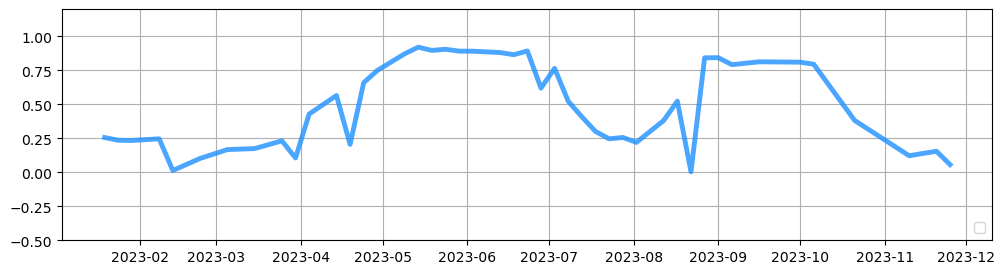

In [24]:
a_field = df[df.ID == IDs[10]].copy()
a_field.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(12, 3), sharex='col', sharey='row',
                       gridspec_kw={'hspace': 0.2, 'wspace': .05});
ax.grid(True);
ax.plot(a_field['human_system_start_time'], a_field[VI_idx],
                linestyle='-',  linewidth=3.5, color="dodgerblue", alpha=0.8)

ax.legend(loc="lower right");
plt.ylim([-0.5, 1.2]);